In [44]:
import numpy as np
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
porter = PorterStemmer()
df = pd.read_csv("train.tsv", sep='\t')
df['Sentiment'].unique()
data1=df.copy()
data1=data1.iloc[:12000,:]
x=np.array(data1['Phrase']).reshape(12000,-1)     
y=data1['Sentiment']
y=np.array(y).reshape(12000,-1)
for i in range(len(y)):
    if(y[i]<3):
        y[i]=0
    elif(y[i]>=3):
        y[i]=1
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x,y = ros.fit_resample(x,y)
dataset=pd.concat([pd.Series(x.reshape(len(x),)),pd.Series(y.reshape(len(y),))],axis=1)
dataset.columns=['Phrase','Sentiment']
x=dataset['Phrase']
y=dataset['Sentiment']
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text
for i in range(len(x)):
    x[i]=tokenizer_porter(str(x[i]))  
for i in range(len(x)):
    x[i]=remove_stopwords(str(x[i]))
for i in range(len(x)):
    x[i]=preprocessor(str(x[i]))
# # # cout=TfidfVectorizer(strip_accents=None,
# # #                         lowercase=False,
# # #                         preprocessor=None,stop_words='english')
# # # x=cout.fit_transform(x)
# # # x=x.todense()


C:\Users\Nithish Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nithish Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nithish Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nithish Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is 

In [46]:
# from tensorflow.keras.utils import to_categorical
# y=to_categorical(y)
# num_classes=y.shape[1]
# num_classes


(18298, 2)

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Flatten,Embedding,Activation
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D
token=Tokenizer()
token.fit_on_texts(x)


In [48]:
vocab_size=len(token.index_word)+1
vocab_size

2569

In [49]:
encode_text=token.texts_to_sequences(x)
print(encode_text)
max_lenth=200



[[32, 889, 2, 2375, 2176, 1, 2076, 8, 83, 7, 19, 17, 1, 1579, 7, 196, 19, 17, 1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [32, 889, 2, 2375, 2176, 1, 2076, 8, 83, 7, 19, 17, 1, 1579], [32, 889], [32], [889], [2, 2375, 2176, 1, 2076, 8, 83, 7, 19, 17, 1, 1579], [2], [2375, 2176, 1, 2076, 8, 83, 7, 19, 17, 1, 1579], [2375], [2176, 1, 2076, 8, 83, 7, 19, 17, 1, 1579], [2176, 1, 2076], [2176], [1, 2076], [1], [2076], [8, 83, 7, 19, 17, 1, 1579], [8], [83, 7, 19, 17, 1, 1579], [83], [7, 19, 17, 1, 1579], [7], [19, 17, 1, 1579], [19], [17, 1, 1579], [17], [1, 1579], [1579], [7, 196, 19, 17, 1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [7, 196, 19, 17, 1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [7, 196], [196], [19, 17, 1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [17, 1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [1, 1974, 46, 2, 98, 203, 155, 16, 1670, 2, 98, 519, 4, 73, 2, 24], [

In [51]:
x=pad_sequences(encode_text,maxlen=max_lenth,padding='post')
x.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
vect_size=300
model=Sequential()
model.add(Embedding(vocab_size,vect_size,input_length=200))
model.add(Conv1D(64,8,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer='adam',  
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [52]:
model.fit(x_train,y_train,epochs=10,batch_size=1024, validation_data=(x_test,y_test))

Train on 12808 samples, validate on 5490 samples
Epoch 1/10
12808/12808 [==============================] - 43s 3ms/sample - loss: 0.6804 - accuracy: 0.5723 - val_loss: 0.6624 - val_accuracy: 0.5944
Epoch 2/10
12808/12808 [==============================] - 45s 3ms/sample - loss: 0.6409 - accuracy: 0.6208 - val_loss: 0.6235 - val_accuracy: 0.6381
Epoch 3/10
12808/12808 [==============================] - 45s 4ms/sample - loss: 0.5739 - accuracy: 0.6972 - val_loss: 0.5819 - val_accuracy: 0.6690
Epoch 4/10
12808/12808 [==============================] - 44s 3ms/sample - loss: 0.4818 - accuracy: 0.7804 - val_loss: 0.5329 - val_accuracy: 0.7694
Epoch 5/10
12808/12808 [==============================] - 43s 3ms/sample - loss: 0.4090 - accuracy: 0.8281 - val_loss: 0.5057 - val_accuracy: 0.8024
Epoch 6/10
12808/12808 [==============================] - 45s 3ms/sample - loss: 0.3569 - accuracy: 0.8531 - val_loss: 0.4930 - val_accuracy: 0.8118
Epoch 7/10
12808/12808 [==============================] -

3600/3600 [==============================] - 10s 3ms/sample - loss: 0.5220 - accuracy: 0.8325


0.5220051145553589

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentence="I acknowledge that forgiving myself for this will benefit others, because:Forgiving yourself can benefit others by helping you become a better parent, a more attentivefriend, a better listener, and more forgiving person and so on. You might be less self-absorbed andmore interested in others. You might become less needy and have more to give. Pick an example of abenefit to others which is likely to really matter to those around you."
print('-------------------------------------Word_tokeize:-------------------------------------------------------')
print(word_tokenize((sentence)))
print('-------------------------------------sentenc_tokenize:----------------------------------------------------')
print(sent_tokenize(sentence))
print('sentences in text')
for i in range(len(sent_tokenize(sentence))):
    print("sentence=",i+1)
    print(sent_tokenize(sentence)[i])


-------------------------------------Word_tokeize:-------------------------------------------------------
['I', 'acknowledge', 'that', 'forgiving', 'myself', 'for', 'this', 'will', 'benefit', 'others', ',', 'because', ':', 'Forgiving', 'yourself', 'can', 'benefit', 'others', 'by', 'helping', 'you', 'become', 'a', 'better', 'parent', ',', 'a', 'more', 'attentivefriend', ',', 'a', 'better', 'listener', ',', 'and', 'more', 'forgiving', 'person', 'and', 'so', 'on', '.', 'You', 'might', 'be', 'less', 'self-absorbed', 'andmore', 'interested', 'in', 'others', '.', 'You', 'might', 'become', 'less', 'needy', 'and', 'have', 'more', 'to', 'give', '.', 'Pick', 'an', 'example', 'of', 'abenefit', 'to', 'others', 'which', 'is', 'likely', 'to', 'really', 'matter', 'to', 'those', 'around', 'you', '.']
-------------------------------------sentenc_tokenize:----------------------------------------------------
['I acknowledge that forgiving myself for this will benefit others, because:Forgiving yourself ca

[nltk_data] Downloading package punkt to C:\Users\Nithish
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
sentence='i am nithish. i work as a datascientist'
print(sent_tokenize((sentence)))

['i am nithish.', 'i work as a datascientist']


In [42]:

import re
from nltk import word_tokenize
s = 'I am going to visit "Huge Hotel" and the "Grand River"'
for phrase in re.findall('"([^"]*)"', s):
    s = s.replace('"{}"'.format(phrase), phrase.replace(' ', '_'))
    print(phrase)
s        
        

TypeError: replace() takes at least 2 arguments (1 given)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentence='You can even think of it like one of those modern vacuum cleaners which uses a cyclone to clean carpets only in this case, by repeatedly going through the Four Steps to Forgiveness, you are creating a cyclone to clean out old patterns of pain and unhappiness. The more often you go through the steps'
for phrase in re.findall('"([^"]*)"', sentence):
    sentence = sentence.replace('"{}"'.format(phrase), phrase.replace(' ', '_'))
print('Word_tokeize:')
print(word_tokenize((sentence)))
print('sentence_tokenize:')
print(sent_tokenize(sentence))


Word_tokeize:
['You', 'can', 'even', 'think', 'of', 'it', 'like', 'one', 'of', 'those', 'modern', 'vacuum', 'cleaners', 'which', 'uses', 'a', 'cyclone', 'to', 'clean', 'carpets', 'only', 'in', 'this', 'case', ',', 'by', 'repeatedly', 'going', 'through', 'the', 'Four', 'Steps', 'to', 'Forgiveness', ',', 'you', 'are', 'creating', 'a', 'cyclone', 'to', 'clean', 'out', 'old', 'patterns', 'of', 'pain', 'and', 'unhappiness', '.', 'The', 'more', 'often', 'you', 'go', 'through', 'the', 'steps']
sentence_tokenize:
['You can even think of it like one of those modern vacuum cleaners which uses a cyclone to clean carpets only in this case, by repeatedly going through the Four Steps to Forgiveness, you are creating a cyclone to clean out old patterns of pain and unhappiness.', 'The more often you go through the steps']


[nltk_data] Downloading package punkt to C:\Users\Nithish
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentence=' You might be less self-absorbed and more interests in others You might become less needed and have more to giveness Pick an example of a benefit to others which is likely to really matter to those around you'
words=word_tokenize(sentence)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("{0}-------------------{1}".format('WORDS','MODIFIED_WORDS'))
for i in words:
     print ('{0} ------------------ {1}'.format(i, lemmatizer.lemmatize(i)))


[nltk_data] Downloading package punkt to C:\Users\Nithish
[nltk_data]     Kumar\AppData\Roaming\nltk_data...


WORDS-------------------MODIFIED_WORDS
You ------------------ You
might ------------------ might
be ------------------ be
less ------------------ le
self-absorbed ------------------ self-absorbed
and ------------------ and
more ------------------ more
interests ------------------ interest
in ------------------ in
others ------------------ others
You ------------------ You
might ------------------ might
become ------------------ become
less ------------------ le
needed ------------------ needed
and ------------------ and
have ------------------ have
more ------------------ more
to ------------------ to
giveness ------------------ giveness
Pick ------------------ Pick
an ------------------ an
example ------------------ example
of ------------------ of
a ------------------ a
benefit ------------------ benefit
to ------------------ to
others ------------------ others
which ------------------ which
is ------------------ is
likely ------------------ likely
to ------------------ to
really ---

[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to C:\Users\Nithish
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['You', 'might', 'be', 'less', 'self-absorbed', 'and', 'more', 'interests', 'in', 'others', 'You', 'might', 'become', 'less', 'needed', 'and', 'have', 'more', 'to', 'giveness', 'Pick', 'an', 'example', 'of', 'a', 'benefit', 'to', 'others', 'which', 'is', 'likely', 'to', 'really', 'matter', 'to', 'those', 'around', 'you']
<FreqDist with 29 samples and 38 outcomes>


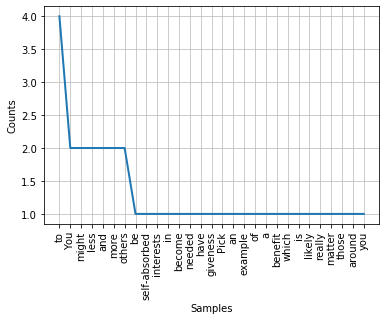

In [49]:
from nltk.probability import FreqDist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentence=' You might be less self-absorbed and more interests in others You might become less needed and have more to giveness Pick an example of a benefit to others which is likely to really matter to those around you'
words=word_tokenize(sentence)
print(words)
fdist=FreqDist(words)
print(fdist)
fdist.most_common(2)
fdist.plot(30,cumulative=False)
plt.show()

AttributeError: module 'pandas' has no attribute 'To_csv'

In [15]:
wordnet_lemmatizer=WordNetLemmatizer()
sent="William is happy to write bespoke articles, give talks and offer workshops, especially on the topic of Forgiveness."
punctuations="?!:;.,"
sent_words=nltk.word_tokenize(sent)
for word in sent_words:
    if (word in punctuations):
        sent_words.remove(word)
for word in sent_words:
    print("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

SyntaxError: invalid character in identifier (<ipython-input-15-a29820ba0a52>, line 5)